In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D

#region Importazionie
file_path = r"C:\Users\JoaquimFrancalanci\OneDrive - ITS Angelo Rizzoli\Desktop\MachineLearning\shopping_behavior_updated.csv"
df = pd.read_csv(file_path)

print(df.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

# Clustering basandosi sulle variabili più rilevantii

In [51]:
#Group customers based on their behaviors for targeted strategies
columns_for_clustering = ['Age', 'Gender', 'Purchase Amount (USD)']

numerical_features = [col for col in columns_for_clustering if df[col].dtype in ["int64", "float64"]]
categorical_features = [col for col in columns_for_clustering if col not in numerical_features]

In [52]:

encoder = OneHotEncoder(sparse_output=False)
encoded_categorical_features = encoder.fit_transform(df[categorical_features])

In [53]:
data_for_clustering = pd.concat([df[numerical_features], pd.DataFrame(encoded_categorical_features, columns=encoder.get_feature_names_out(categorical_features))], axis=1)

data_for_clustering.head()

,Age,Purchase Amount (USD),Gender_Female,Gender_Male
0,55,53,0.0,1.0
1,19,64,0.0,1.0
2,50,73,0.0,1.0
3,21,90,0.0,1.0
4,45,49,0.0,1.0


In [54]:
scaler = StandardScaler()
scaler.fit(data_for_clustering)
data_for_clustering = scaler.transform(data_for_clustering)

In [55]:
def perform_kmeans(data, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    return silhouette_avg, cluster_labels

num_clusters = 4

kmeans_silhouette, kmeans_labels = perform_kmeans(data_for_clustering, num_clusters)
df['KMeans_Cluster'] = kmeans_labels

print(f"KMeans clustering silhouette score: {kmeans_silhouette}")

c:\Users\JoaquimFrancalanci\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans clustering silhouette score: 0.4077575308297177


In [56]:
def perform_hierarchical_clustering(data, num_clusters):
    hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = hierarchical.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    return silhouette_avg, cluster_labels

hierarchical_silhouette, hierarchical_labels = perform_hierarchical_clustering(data_for_clustering, num_clusters)
df['Hierarchical_Cluster'] = hierarchical_labels

print(f"Hierarchical clustering silhouette score: {hierarchical_silhouette}")

Hierarchical clustering silhouette score: 0.3865627926739396


In [57]:
def perform_dbscan(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    return silhouette_avg, cluster_labels

dbscan_silhouette, dbscan_labels = perform_dbscan(data_for_clustering, eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan_labels

print(f"DBSCA clustering silhouette score: {dbscan_silhouette}")

DBSCA clustering silhouette score: 0.5009489559591096


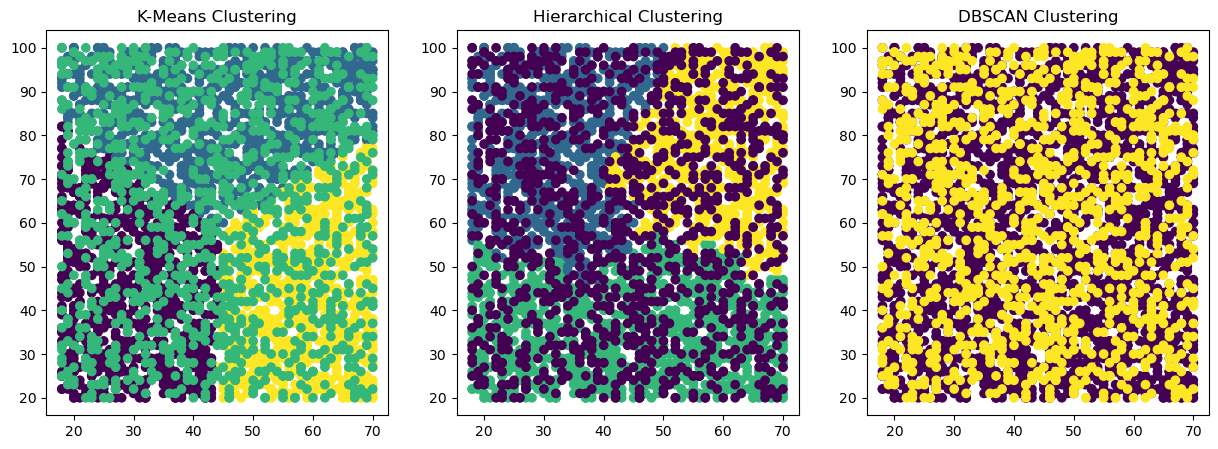

In [58]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(df['Age'], df['Purchase Amount (USD)'], c=df['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')

plt.subplot(132)
plt.scatter(df['Age'], df['Purchase Amount (USD)'], c=df['Hierarchical_Cluster'], cmap='viridis')
plt.title('Hierarchical Clustering')

plt.subplot(133)
plt.scatter(df['Age'], df['Purchase Amount (USD)'], c=df['DBSCAN_Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')

plt.show()

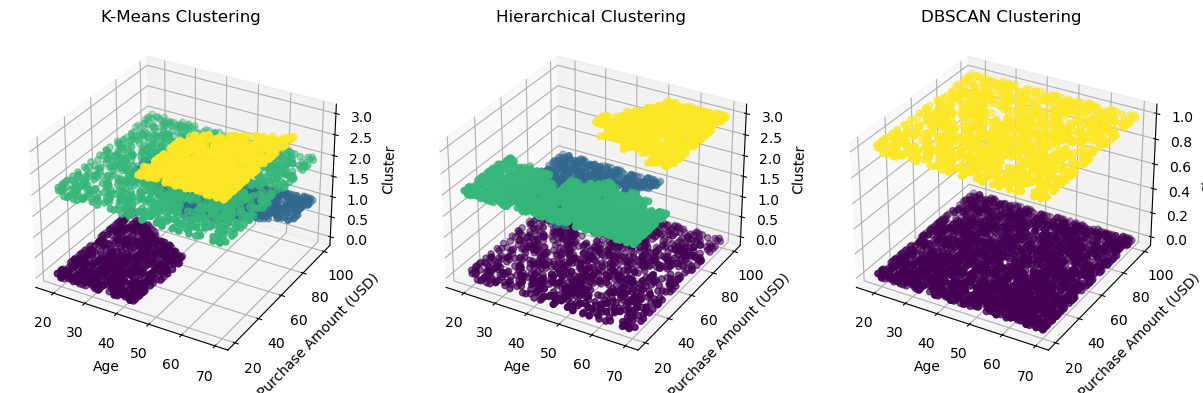

In [59]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(df['Age'], df['Purchase Amount (USD)'], df['KMeans_Cluster'], c=df['KMeans_Cluster'], cmap='viridis')
ax1.set_title('K-Means Clustering')
ax1.set_xlabel('Age')
ax1.set_ylabel('Purchase Amount (USD)')
ax1.set_zlabel('Cluster')

ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(df['Age'], df['Purchase Amount (USD)'], df['Hierarchical_Cluster'], c=df['Hierarchical_Cluster'], cmap='viridis')
ax2.set_title('Hierarchical Clustering')
ax2.set_xlabel('Age')
ax2.set_ylabel('Purchase Amount (USD)')
ax2.set_zlabel('Cluster')

ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(df['Age'], df['Purchase Amount (USD)'], df['DBSCAN_Cluster'], c=df['DBSCAN_Cluster'], cmap='viridis')
ax3.set_title('DBSCAN Clustering')
ax3.set_xlabel('Age')
ax3.set_ylabel('Purchase Amount (USD)')
ax3.set_zlabel('Cluster')

plt.show()

# Clustering Rispetto all'acquisto

In [60]:
#Group customers based on their behaviors for targeted strategies
columns_for_clustering = ['Payment Method', 'Frequency of Purchases','Purchase Amount (USD)', 'Discount Applied', 'Promo Code Used']

numerical_features = [col for col in columns_for_clustering if df[col].dtype in ["int64", "float64"]]
categorical_features = [col for col in columns_for_clustering if col not in numerical_features]

In [61]:
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical_features = encoder.fit_transform(df[categorical_features])

In [62]:
data_for_clustering = pd.concat([df[numerical_features], 
                                 pd.DataFrame(encoded_categorical_features, 
                                              columns=encoder.get_feature_names_out(categorical_features))], axis=1)

In [63]:
scaler = StandardScaler()
scaler.fit(data_for_clustering)
data_for_clustering = scaler.transform(data_for_clustering)

In [64]:
# Algoritmo Kmeans
def perform_kmeans(data, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    return silhouette_avg, cluster_labels

num_clusters = 4

kmeans_silhouette, kmeans_labels = perform_kmeans(data_for_clustering, num_clusters)
df['KMeans_Cluster'] = kmeans_labels

print(f"KMeans clustering silhouette score: {kmeans_silhouette}")

c:\Users\JoaquimFrancalanci\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans clustering silhouette score: 0.14356246323821448


In [65]:
# Algoritmo Hierachical
def perform_hierarchical_clustering(data, num_clusters):
    hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = hierarchical.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    return silhouette_avg, cluster_labels

hierarchical_silhouette, hierarchical_labels = perform_hierarchical_clustering(data_for_clustering, num_clusters)
df['Hierarchical_Cluster'] = hierarchical_labels

print(f"Hierarchical clustering silhouette score: {hierarchical_silhouette}")

Hierarchical clustering silhouette score: 0.1550285099665248


In [66]:
# Algoritmo DBSCAN
def perform_dbscan(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    return silhouette_avg, cluster_labels

dbscan_silhouette, dbscan_labels = perform_dbscan(data_for_clustering, eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan_labels

print(f"DBSCA clustering silhouette score: {dbscan_silhouette}")

DBSCA clustering silhouette score: 0.7036289083786726


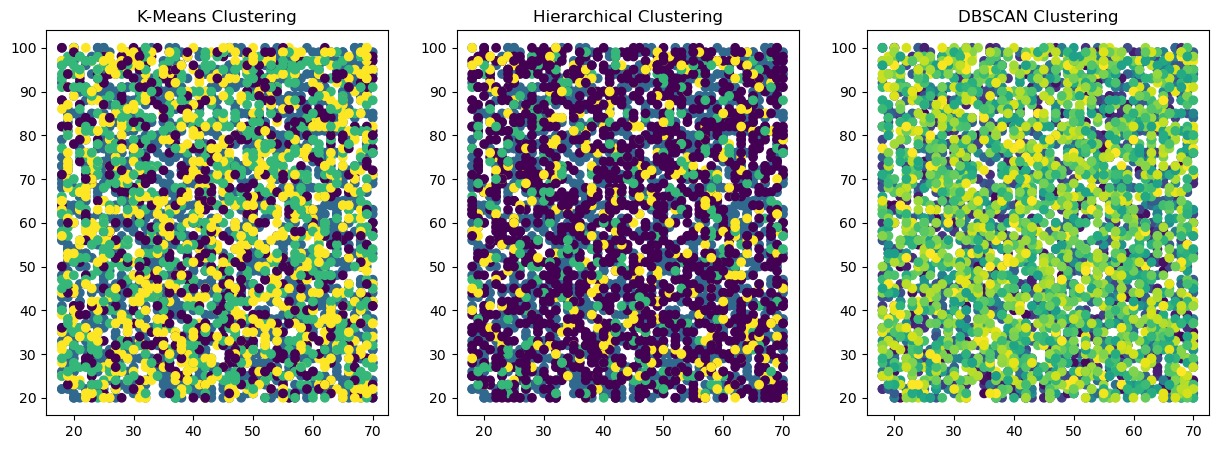

In [67]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(df['Age'], df['Purchase Amount (USD)'], c=df['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')

plt.subplot(132)
plt.scatter(df['Age'], df['Purchase Amount (USD)'], c=df['Hierarchical_Cluster'], cmap='viridis')
plt.title('Hierarchical Clustering')

plt.subplot(133)
plt.scatter(df['Age'], df['Purchase Amount (USD)'], c=df['DBSCAN_Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')

plt.show()

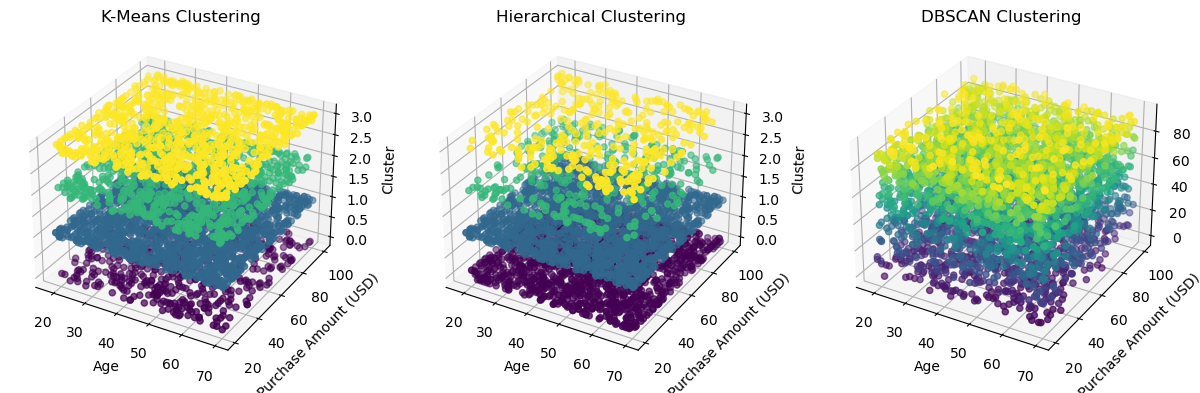

In [68]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(df['Age'], df['Purchase Amount (USD)'], df['KMeans_Cluster'], c=df['KMeans_Cluster'], cmap='viridis')
ax1.set_title('K-Means Clustering')
ax1.set_xlabel('Age')
ax1.set_ylabel('Purchase Amount (USD)')
ax1.set_zlabel('Cluster')

ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(df['Age'], df['Purchase Amount (USD)'], df['Hierarchical_Cluster'], c=df['Hierarchical_Cluster'], cmap='viridis')
ax2.set_title('Hierarchical Clustering')
ax2.set_xlabel('Age')
ax2.set_ylabel('Purchase Amount (USD)')
ax2.set_zlabel('Cluster')

ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(df['Age'], df['Purchase Amount (USD)'], df['DBSCAN_Cluster'], c=df['DBSCAN_Cluster'], cmap='viridis')
ax3.set_title('DBSCAN Clustering')
ax3.set_xlabel('Age')
ax3.set_ylabel('Purchase Amount (USD)')
ax3.set_zlabel('Cluster')

plt.show()